# Install

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 19.3 MB/s 


In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 32.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Libraries

In [ ]:
import yfinance as yf

import math
from math import sqrt

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from keras.utils.vis_utils import plot_model
from pandas.plotting import scatter_matrix
from keras.models import Sequential
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, Activation, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

from kerastuner.tuners import RandomSearch
import kerastuner as kt
import time

# Importing Data

In [ ]:
microsoft_stock = yf.download('MSFT', start='2019-01-01', end='2022-04-01') #first
google_stock = yf.download('GOOGL', start='2019-01-01', end='2022-04-01') #second
apple_stock = yf.download('AAPL', start='2019-01-01', end='2022-04-01') #third

microsoft_stock.reset_index(inplace=True)
google_stock.reset_index(inplace=True)
apple_stock.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# EDA

## Microsoft

In [ ]:
microsoft_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,99.550003,101.750000,98.940002,101.120003,97.580666,35329300
1,2019-01-03,100.099998,100.190002,97.199997,97.400002,93.990868,42579100
2,2019-01-04,99.720001,102.510002,98.930000,101.930000,98.362320,44060600
3,2019-01-07,101.639999,103.269997,100.980003,102.059998,98.487747,35656100
4,2019-01-08,103.040001,103.970001,101.709999,102.800003,99.201859,31514400


In [ ]:
microsoft_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,819.000000,819.000000,819.000000,819.000000,819.000000,8.190000e+02
mean,207.334383,209.403065,205.173455,207.425995,204.929032,3.010560e+07
std,68.292317,68.882918,67.581405,68.269717,69.263394,1.327194e+07
min,99.550003,100.190002,97.199997,97.400002,93.990868,8.989200e+06
25%,140.364998,141.664993,139.260002,140.404999,136.955978,2.172300e+07
50%,207.729996,210.279999,205.000000,207.820007,204.852127,2.672850e+07
75%,259.434998,261.240005,257.434998,259.695007,258.156784,3.404570e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,9.701270e+07


In [ ]:
microsoft_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       819 non-null    datetime64[ns]
 1   Open       819 non-null    float64       
 2   High       819 non-null    float64       
 3   Low        819 non-null    float64       
 4   Close      819 non-null    float64       
 5   Adj Close  819 non-null    float64       
 6   Volume     819 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 44.9 KB


To observe any trend or pattern we can take the help of a 50-day 200-day average

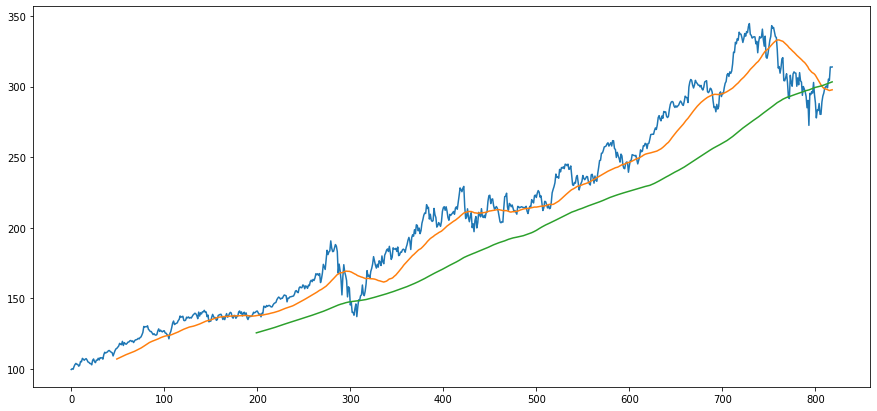

In [ ]:
microsoft_stock['MA50'] = microsoft_stock['Open'].rolling(50).mean()
microsoft_stock['MA200'] = microsoft_stock['Open'].rolling(200).mean()
microsoft_stock['Open'].plot(figsize = (15,7))
microsoft_stock['MA50'].plot()
microsoft_stock['MA200'].plot()

Microsoft stock over the time

[*********************100%***********************]  1 of 1 completed


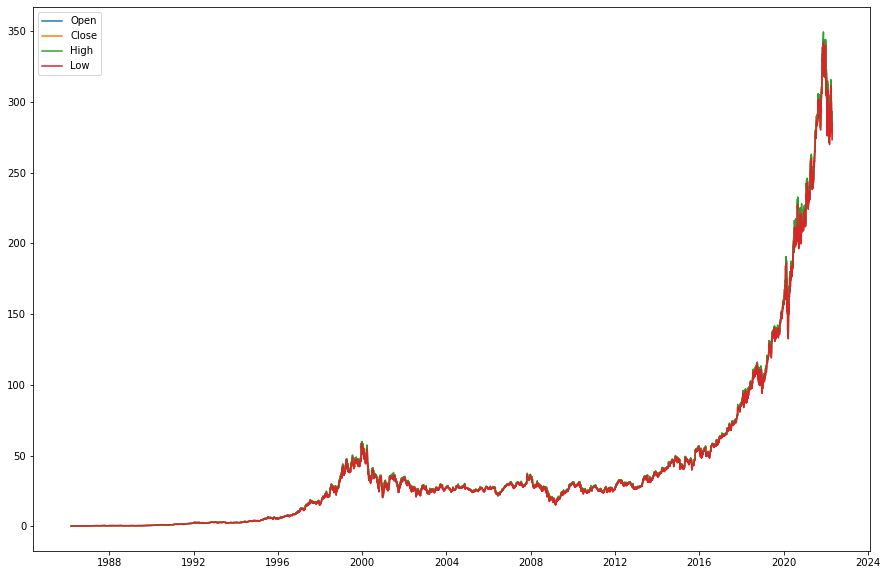

In [ ]:
msft = yf.download("MSFT")
msft.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
plt.plot( msft['Date'], msft['Open'], label = 'Open')
plt.plot( msft['Date'], msft['Close'], label = 'Close')
plt.plot( msft['Date'], msft['High'], label = 'High')
plt.plot( msft['Date'], msft['Low'], label = 'Low')
plt.legend(loc='upper left')
plt.show()

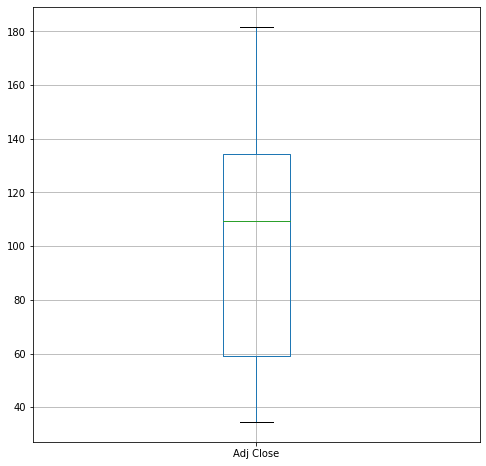

In [ ]:
apple_stock.boxplot(column=['Adj Close'], figsize=(8,8))

## Google

In [ ]:
google_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
1,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
2,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
4,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [ ]:
google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,819.000000,819.000000,819.000000,819.000000,819.000000,8.190000e+02
mean,1792.831147,1811.014552,1774.446144,1793.517583,1793.517583,1.700113e+06
std,639.526024,644.431496,632.571875,638.310948,638.310948,8.004193e+05
min,1027.199951,1050.000000,1008.869995,1025.469971,1025.469971,4.656000e+05
25%,1230.339966,1243.570007,1221.740051,1232.250000,1232.250000,1.193850e+06
50%,1513.250000,1525.949951,1499.000000,1513.390015,1513.390015,1.494400e+06
75%,2410.719971,2431.719971,2395.839966,2405.119995,2405.119995,1.915000e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,6.658900e+06


In [ ]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       819 non-null    datetime64[ns]
 1   Open       819 non-null    float64       
 2   High       819 non-null    float64       
 3   Low        819 non-null    float64       
 4   Close      819 non-null    float64       
 5   Adj Close  819 non-null    float64       
 6   Volume     819 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 44.9 KB


To observe any trend or pattern we can take the help of a 50-day 200-day average

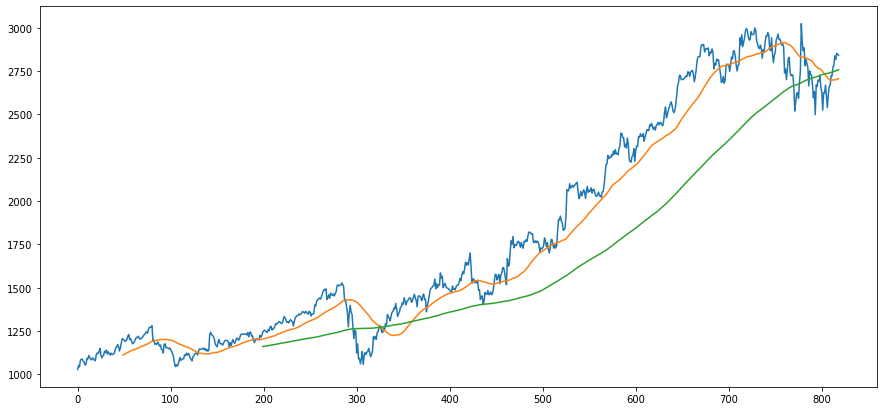

In [ ]:
google_stock['MA50'] = google_stock['Open'].rolling(50).mean()
google_stock['MA200'] = google_stock['Open'].rolling(200).mean()
google_stock['Open'].plot(figsize = (15,7))
google_stock['MA50'].plot()
google_stock['MA200'].plot()

Google stock over the time

[*********************100%***********************]  1 of 1 completed


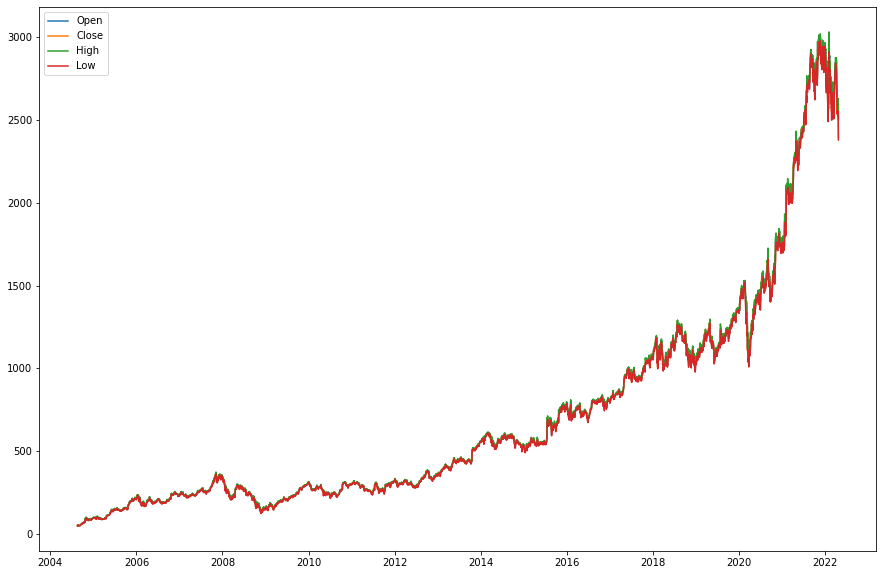

In [ ]:
google = yf.download("GOOGL")
google.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
plt.plot( google['Date'], google['Open'], label = 'Open')
plt.plot( google['Date'], google['Close'], label = 'Close')
plt.plot( google['Date'], google['High'], label = 'High')
plt.plot( google['Date'], google['Low'], label = 'Low')
plt.legend(loc='upper left')
plt.show()

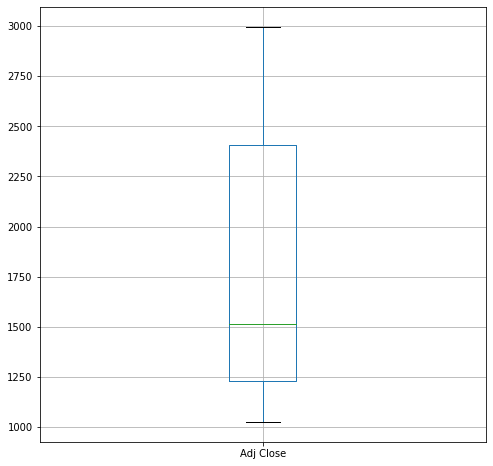

In [ ]:
google_stock.boxplot(column=['Adj Close'], figsize=(8,8))

## Apple

In [ ]:
apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277523,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464802,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936081,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539619,164101200


In [ ]:
apple_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,819.000000,819.000000,819.000000,819.000000,819.000000,8.190000e+02
mean,101.481468,102.686612,100.350354,101.585342,100.749061,1.182512e+08
std,42.669858,43.150540,42.154331,42.670835,42.969112,5.601600e+07
min,35.994999,36.430000,35.500000,35.547501,34.464802,4.100000e+07
25%,59.661251,60.680000,58.972500,60.058750,58.927475,8.251900e+07
50%,110.404999,112.199997,108.730003,110.339996,109.335770,1.039164e+08
75%,135.864998,136.975006,133.940002,135.250000,134.450890,1.374164e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,4.265100e+08


In [ ]:
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       819 non-null    datetime64[ns]
 1   Open       819 non-null    float64       
 2   High       819 non-null    float64       
 3   Low        819 non-null    float64       
 4   Close      819 non-null    float64       
 5   Adj Close  819 non-null    float64       
 6   Volume     819 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 44.9 KB


To observe any trend or pattern we can take the help of a 50-day 200-day average

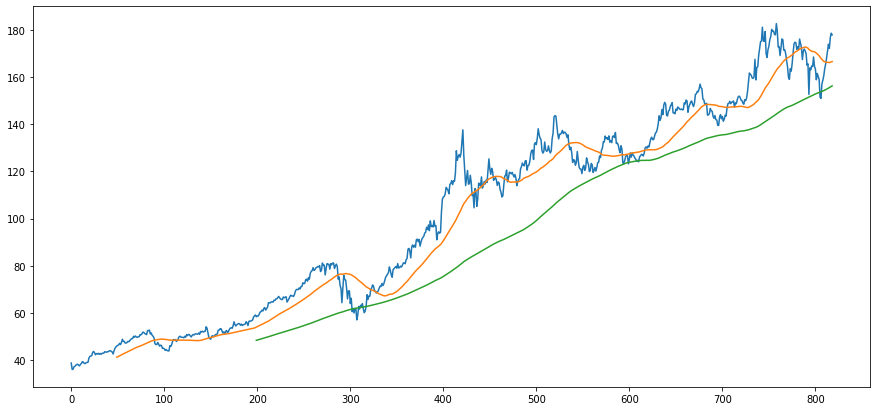

In [ ]:
apple_stock['MA50'] = apple_stock['Open'].rolling(50).mean()
apple_stock['MA200'] = apple_stock['Open'].rolling(200).mean()
apple_stock['Open'].plot(figsize = (15,7))
apple_stock['MA50'].plot()
apple_stock['MA200'].plot()

Apple stock over the time

[*********************100%***********************]  1 of 1 completed


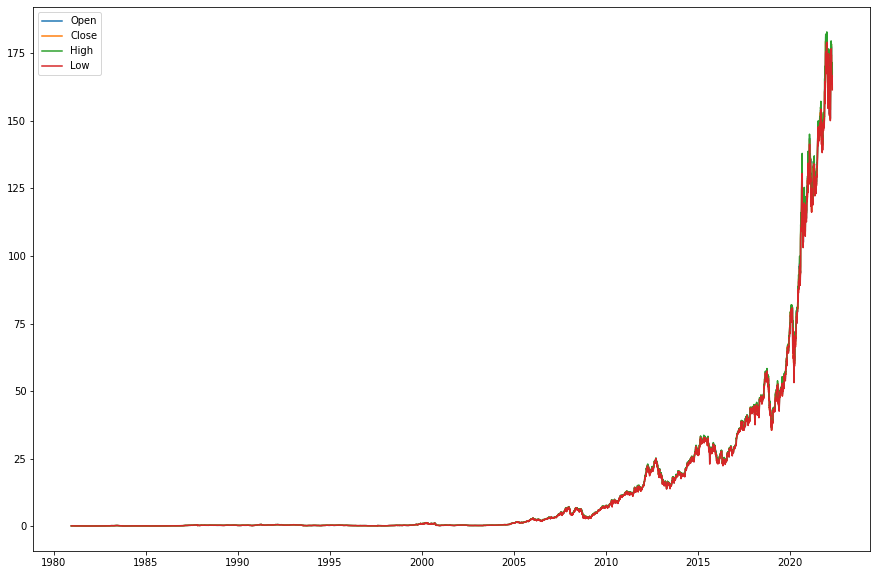

In [ ]:
apple = yf.download("AAPL")
apple.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
plt.plot( apple['Date'], apple['Open'], label = 'Open')
plt.plot( apple['Date'], apple['Close'], label = 'Close')
plt.plot( apple['Date'], apple['High'], label = 'High')
plt.plot( apple['Date'], apple['Low'], label = 'Low')
plt.legend(loc='upper left')
plt.show()

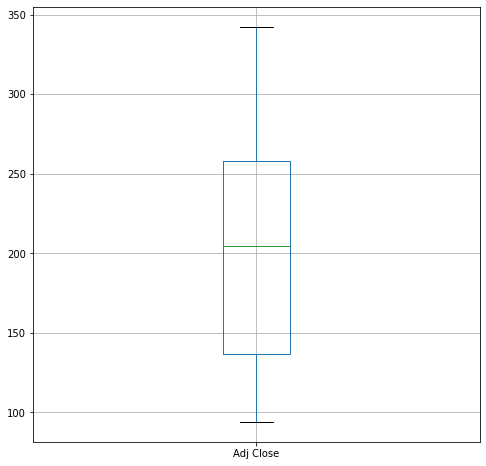

In [ ]:
microsoft_stock.boxplot(column=['Adj Close'], figsize=(8,8))

## Comparing the stocks

In [ ]:
print(microsoft_stock.shape , google_stock.shape, apple_stock.shape)

(819, 9) (819, 9) (819, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb75d148890>,
      dtype=object)

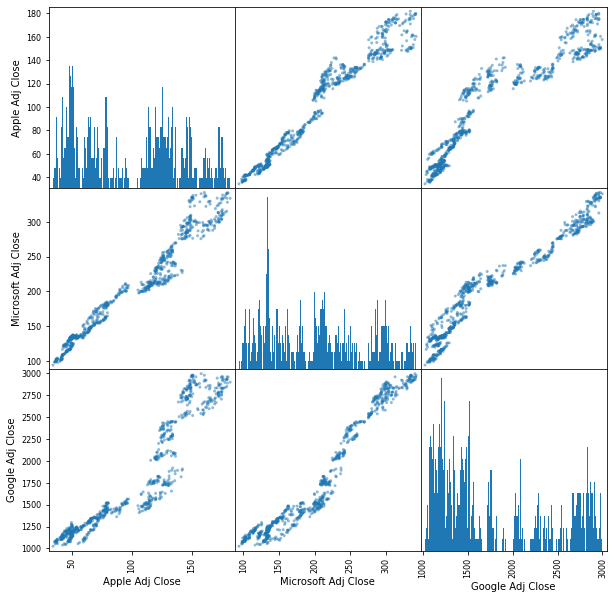

In [ ]:
data = pd.DataFrame({'Apple Adj Close':apple_stock['Adj Close'],'Microsoft Adj Close':microsoft_stock['Adj Close'],'Google Adj Close':google_stock['Adj Close']})
scatter_matrix(data, figsize = (10,10), hist_kwds= {'bins':250})
# data

Percentage increase in stock value

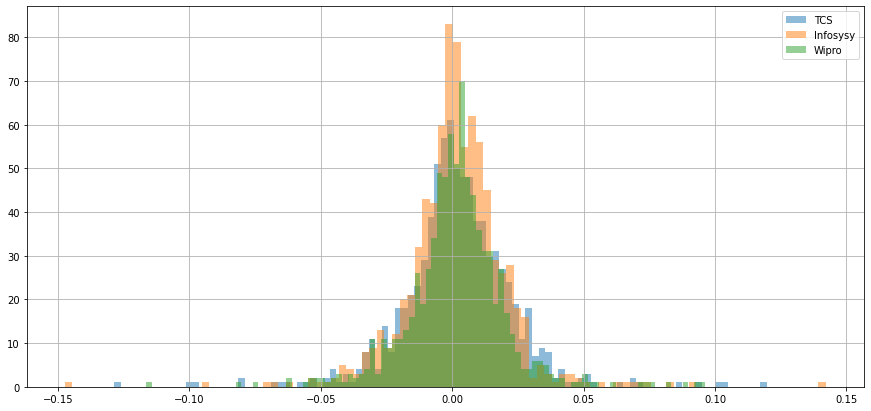

In [ ]:
#Volatility
apple_stock['returns'] = (apple_stock['Close']/apple_stock['Close'].shift(1)) -1
microsoft_stock['returns'] = (microsoft_stock['Close']/microsoft_stock['Close'].shift(1))-1
google_stock['returns'] = (google_stock['Close']/google_stock['Close'].shift(1)) - 1
apple_stock['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
microsoft_stock['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
google_stock['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

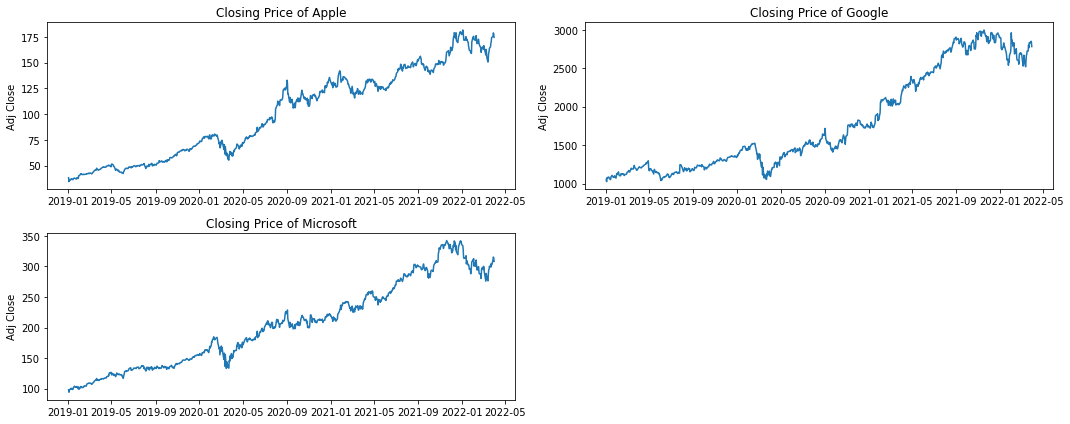

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(apple_stock.Date, apple_stock[['Adj Close']])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Apple")

plt.subplot(2, 2, 2)
plt.plot(google_stock.Date, google_stock[['Adj Close']])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")

plt.subplot(2, 2, 3)
plt.plot(microsoft_stock.Date, microsoft_stock[['Adj Close']])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Microsoft")

plt.tight_layout()

# Pre processing

**Check for Null Values:** 
We check for null values in the data frame to ensure that there are none. The existence of null values in the dataset causes issues during training since they function as outliers, creating a wide variance in the training process.

---


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', apple_stock.shape)
print('Null Value Present:', apple_stock.isna().any())

Dataframe Shape:  (819, 10)
Null Value Present: Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
MA50          True
MA200         True
returns       True
dtype: bool


In [ ]:
print('Dataframe Shape: ', google_stock.shape)
print('Null Value Present:', google_stock.isna().any())

Dataframe Shape:  (819, 10)
Null Value Present: Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
MA50          True
MA200         True
returns       True
dtype: bool


In [ ]:
print('Dataframe Shape: ', microsoft_stock.shape)
print('Null Value Present:', microsoft_stock.isna().any())

Dataframe Shape:  (819, 10)
Null Value Present: Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
MA50          True
MA200         True
returns       True
dtype: bool


To prepare the dataset for the LSTM model we are scaling the dataset and making it into 3 Dimensional array. 

In [ ]:
def train_test_lstm(df, n_inputs):

  dataset = df[['Adj Close']]
  
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  X = []
  y = []

  for i in range(n_inputs, len(scaled_data)):
    X.append(scaled_data[i-n_inputs:i, 0])
    y.append(scaled_data[i,0])

  X, y = np.array(X), np.array(y)

  X = np.reshape(X, (X.shape[0], X.shape[1], 1))

  # PROCESSING
  train_len = math.ceil(len(X)*0.8)

  X_train = X[:train_len]
  X_test = X[train_len:]

  y_train = y[:train_len]
  y_test = y[train_len:]

  return X_train, X_test, y_train, y_test, scaler

To prepare the dataset for the LSTM + CNN model we are scaling the dataset and making it into 4 Dimensional array. 

In [ ]:
def train_test_lstm_cnn(df, n_inputs):

  dataset = df[['Adj Close']]
  
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  X = []
  y = []

  for i in range(n_inputs, len(scaled_data)):
    X.append(scaled_data[i-n_inputs:i, 0])
    y.append(scaled_data[i,0])

  X, y = np.array(X), np.array(y)

  X = np.reshape(X, (X.shape[0], 1, X.shape[1], 1))

  # PROCESSING
  train_len = math.ceil(len(X)*0.8)

  X_train = X[:train_len]
  X_test = X[train_len:]

  y_train = y[:train_len]
  y_test = y[train_len:]


  return X_train, X_test, y_train, y_test, scaler

# Building & Prediciting LSTM Model

In [ ]:
LOG_DIR = f"{int(time.time())}"

def build_model_tuner(hp):

  model = Sequential()
  model.add(LSTM(hp.Int("input_units_1",5,60,5), return_sequences=True, activation='relu',input_shape=(30, 1)))
  model.add(LSTM(hp.Int("input_units_2",8,64,8), return_sequences=False))
  model.add(Dense(hp.Int("input_units_3",5,60,5)))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])


  return model

In [ ]:
tuner = RandomSearch(
    build_model_tuner,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials = 3,
    executions_per_trial = 1,
    directory = LOG_DIR
)

In [ ]:
def build_model_LSTM(input_units):

  lstm = Sequential()
  lstm.add(LSTM(input_units[0], return_sequences=True, activation='relu',input_shape=(X_train.shape[1], 1)))
  lstm.add(LSTM(input_units[1], return_sequences=False))
  lstm.add(Dense(input_units[2]))
  lstm.add(Dense(1))
  
  lstm.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])

  return lstm

In [ ]:
def plot_loss(history):

  history_dict = history.history

  loss = history_dict["loss"]
  root_mean_squared_error = history_dict["root_mean_squared_error"]
  val_loss = history_dict["val_loss"]
  val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]
  epochs = range(1, len(loss) + 1)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  fig.set_figheight(5)
  fig.set_figwidth(15)

  ax1.plot(epochs, loss, label = 'Training Loss')
  ax1.plot(epochs, val_loss, label = 'Validation Loss')
  ax1.set(xlabel = "Epochs", ylabel = "Loss")
  ax1.legend()

  ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
  ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
  ax2.set(xlabel = "Epochs", ylabel = "Loss")
  ax2.legend()

  plt.show()

In [ ]:
def predict(model, X_test, y_test, scaler):
  predictions = model.predict(X_test)
  predictions = scaler.inverse_transform(predictions).flatten()

  actual_price = y_test
  actual_price = actual_price.reshape(-1,1)
  actual_price = scaler.inverse_transform(actual_price).flatten()
  
  rmse = sqrt(mean_squared_error(actual_price, predictions))
  mape = np.mean(np.abs(predictions - actual_price)/np.abs(actual_price))
  print('RMSE Score: %.3f' % rmse)
  print('MAPE Score: %.3f' % mape)
  
  plt.figure(figsize=(10,6))
  plt.plot(actual_price, color = 'red', label = 'actual')
  plt.plot(predictions, color = 'blue', label = 'predicted')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

  df = pd.DataFrame({'actual':actual_price,'predicted':predictions})
  return df

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm(apple_stock, 30)

In [ ]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs = 100,
    batch_size = 64,
    validation_data = (X_test, y_test),

)
print(tuner.results_summary())

Trial 3 Complete [00h 00m 37s]
val_root_mean_squared_error: 0.03256465494632721

Best val_root_mean_squared_error So Far: 0.026524703949689865
Total elapsed time: 00h 02m 42s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1650830499/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_units_1: 45
input_units_2: 64
input_units_3: 25
Score: 0.026524703949689865
Trial summary
Hyperparameters:
input_units_1: 30
input_units_2: 24
input_units_3: 60
Score: 0.029202133417129517
Trial summary
Hyperparameters:
input_units_1: 25
input_units_2: 16
input_units_3: 30
Score: 0.03256465494632721
None


In [ ]:
lstm = build_model_LSTM([45,64,25])
# lstm = build_model_LSTM([50,16,50])

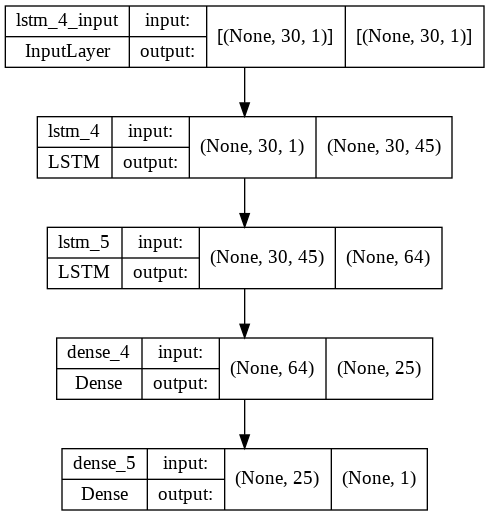

In [ ]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 45)            8460      
                                                                 
 lstm_5 (LSTM)               (None, 64)                28160     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38,271
Trainable params: 38,271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = lstm.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
79/79 [==============================] - 5s 29ms/step - loss: 0.0063 - root_mean_squared_error: 0.0797 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 2/100
79/79 [==============================] - 2s 21ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 3/100
79/79 [==============================] - 2s 22ms/step - loss: 0.0089 - root_mean_squared_error: 0.0944 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 4/100
79/79 [==============================] - 2s 22ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 5/100
79/79 [==============================] - 2s 21ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 6/100
79/79 [==============================] - 2s 22ms/step - loss: 0.0018 - root_mean_squared_error: 0.0426 - val_loss: 0.0022 - val_

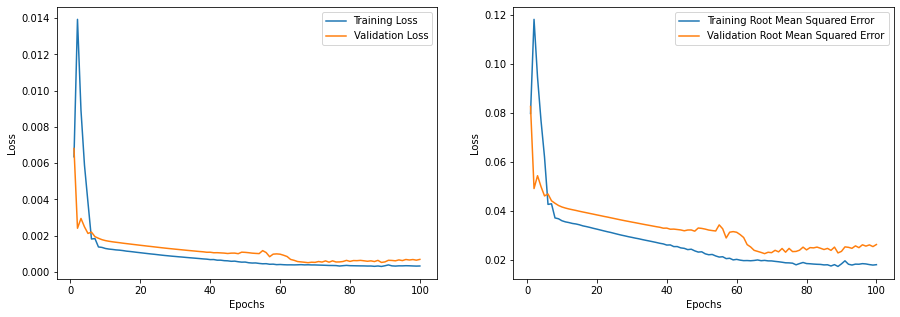

In [ ]:
plot_loss(history)

RMSE Score: 3.864
MAPE Score: 0.021


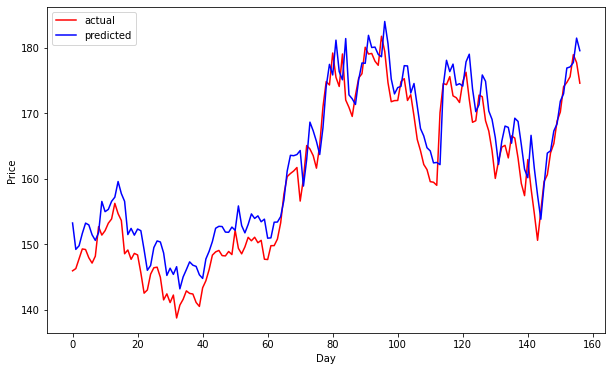

,actual,predicted
0,145.960739,153.262558
1,146.299805,149.232925
2,147.785751,149.784973
3,149.301620,151.669235
4,149.211838,153.244904
...,...,...
152,174.720001,176.924866
153,175.600006,177.092621
154,178.960007,177.757812
155,177.770004,181.495056


In [ ]:
predict(lstm, X_test, y_test, scaler)

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm(microsoft_stock, 30)

In [ ]:
history = lstm.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size=16, verbose=1, shuffle=False)

Epoch 1/100
40/40 [==============================] - 3s 28ms/step - loss: 4.7559e-04 - root_mean_squared_error: 0.0218 - val_loss: 6.9754e-04 - val_root_mean_squared_error: 0.0264
Epoch 2/100
40/40 [==============================] - 1s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 4.9689e-04 - val_root_mean_squared_error: 0.0223
Epoch 3/100
40/40 [==============================] - 1s 28ms/step - loss: 6.0230e-04 - root_mean_squared_error: 0.0245 - val_loss: 6.0448e-04 - val_root_mean_squared_error: 0.0246
Epoch 4/100
40/40 [==============================] - 1s 27ms/step - loss: 3.4125e-04 - root_mean_squared_error: 0.0185 - val_loss: 5.0047e-04 - val_root_mean_squared_error: 0.0224
Epoch 5/100
40/40 [==============================] - 1s 27ms/step - loss: 5.8437e-04 - root_mean_squared_error: 0.0242 - val_loss: 4.7979e-04 - val_root_mean_squared_error: 0.0219
Epoch 6/100
40/40 [==============================] - 1s 28ms/step - loss: 3.2648e-04 - root_mean_squared

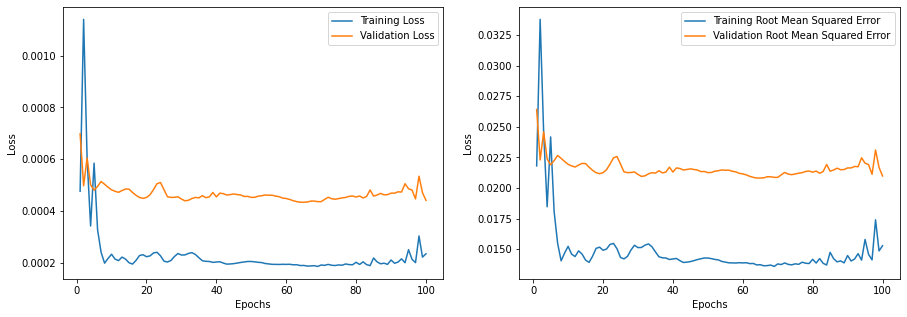

In [ ]:
plot_loss(history)

RMSE Score: 5.213
MAPE Score: 0.013


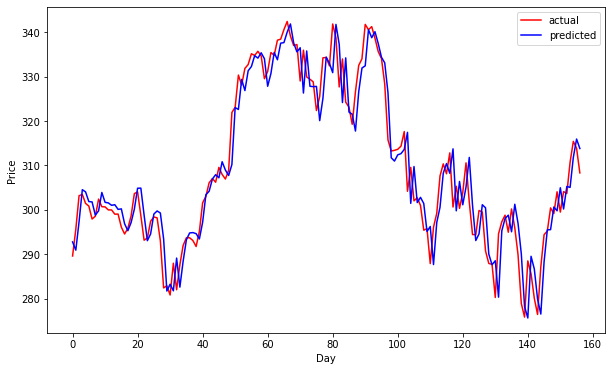

,actual,predicted
0,289.600281,292.772827
1,295.616760,290.919220
2,303.177277,297.322723
3,303.466187,304.534912
4,301.444061,304.033966
...,...,...
152,303.679993,305.260925
153,310.700012,305.045746
154,315.410004,311.813232
155,313.859985,315.928802


In [ ]:
predict(lstm, X_test, y_test, scaler)

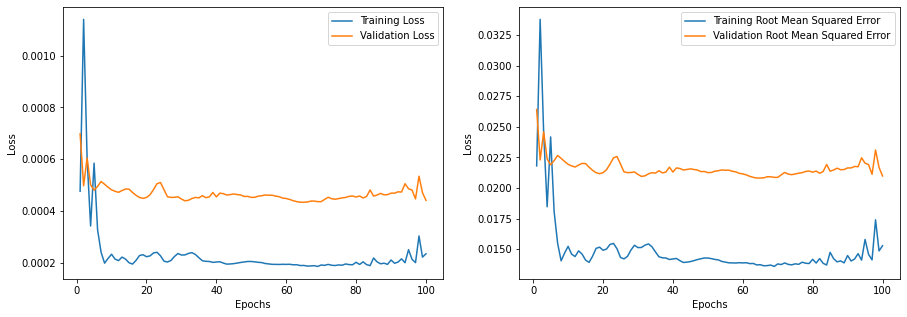

In [ ]:
plot_loss(history)

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm(google_stock, 30)
history = lstm.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size=16, verbose=1, shuffle=False)

Epoch 1/100
40/40 [==============================] - 1s 30ms/step - loss: 3.1729e-04 - root_mean_squared_error: 0.0178 - val_loss: 6.4730e-04 - val_root_mean_squared_error: 0.0254
Epoch 2/100
40/40 [==============================] - 1s 28ms/step - loss: 2.9990e-04 - root_mean_squared_error: 0.0173 - val_loss: 7.1039e-04 - val_root_mean_squared_error: 0.0267
Epoch 3/100
40/40 [==============================] - 1s 29ms/step - loss: 2.9465e-04 - root_mean_squared_error: 0.0172 - val_loss: 6.7363e-04 - val_root_mean_squared_error: 0.0260
Epoch 4/100
40/40 [==============================] - 1s 28ms/step - loss: 3.4593e-04 - root_mean_squared_error: 0.0186 - val_loss: 6.4790e-04 - val_root_mean_squared_error: 0.0255
Epoch 5/100
40/40 [==============================] - 1s 27ms/step - loss: 4.9579e-04 - root_mean_squared_error: 0.0223 - val_loss: 6.4648e-04 - val_root_mean_squared_error: 0.0254
Epoch 6/100
40/40 [==============================] - 1s 27ms/step - loss: 6.3473e-04 - root_mean_squ

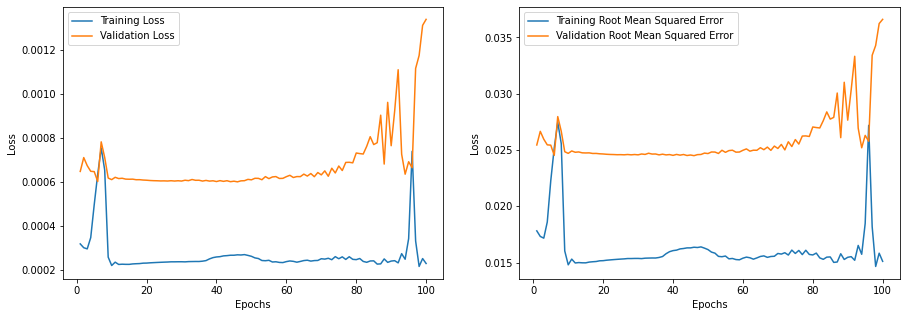

In [ ]:
plot_loss(history)

RMSE Score: 72.154
MAPE Score: 0.021


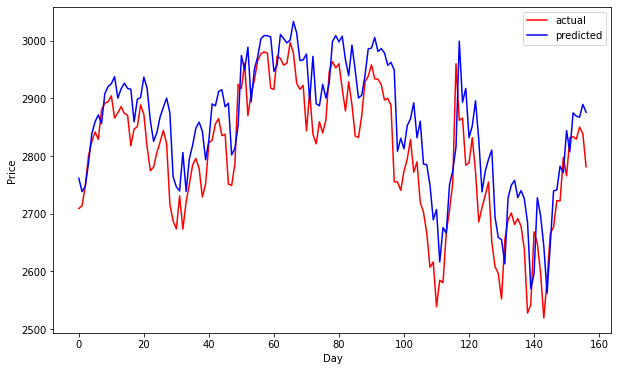

,actual,predicted
0,2708.979980,2761.288574
1,2713.600098,2738.088867
2,2748.590088,2747.612061
3,2800.830078,2788.353027
4,2825.229980,2838.866455
...,...,...
152,2833.459961,2874.730713
153,2829.110107,2869.092529
154,2850.110107,2867.324951
155,2838.770020,2889.561768


In [ ]:
predict(lstm, X_test, y_test, scaler)

# Building & Prediciting LSTM+CNN Model

In [ ]:
LOG_DIR = f"{int(time.time())}"

def build_model_tuner(hp):

  model = tf.keras.Sequential()

  # Creating the Neural Network model here...
  # CNN layers
  model.add(TimeDistributed(Conv1D(hp.Int("input_units_1",8,64,8), kernel_size=3, activation='relu', input_shape=(None, X_train.shape[1], 1))))
  model.add(TimeDistributed(MaxPooling1D(hp.Int("input_units_2",1,5,1))))
  model.add(TimeDistributed(Flatten()))

  # LSTM layers
  model.add(Bidirectional(LSTM(hp.Int("input_units_3",5,75,5), return_sequences=True)))
  model.add(LSTM(hp.Int("input_units_4",5,75,5), return_sequences=False))
  model.add(Dense(hp.Int("input_units_5",5,50,5)))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])


  return model

In [ ]:
tuner = RandomSearch(
    build_model_tuner,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials = 3,
    executions_per_trial = 1,
    directory = LOG_DIR
)

In [ ]:
def build_model_LSTMCNN(input_units):

  model = tf.keras.Sequential()

  # Creating the Neural Network model here...
  # CNN layers
  model.add(TimeDistributed(Conv1D(input_units[0], kernel_size=3, activation='relu', input_shape=(None, X_train.shape[1], 1))))
  model.add(TimeDistributed(MaxPooling1D(input_units[1])))
  model.add(TimeDistributed(Flatten()))

  # LSTM layers
  model.add(Bidirectional(LSTM(input_units[2], return_sequences=True)))
  model.add(LSTM(input_units[3], return_sequences=False))
  model.add(Dense(input_units[4]))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])


  return model

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm_cnn(apple_stock, 30)

In [ ]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs = 100,
    batch_size = 64,
    validation_data = (X_test, y_test),

)
print(tuner.results_summary())

Trial 3 Complete [00h 00m 47s]
val_root_mean_squared_error: 0.0333314910531044

Best val_root_mean_squared_error So Far: 0.026903506368398666
Total elapsed time: 00h 01m 37s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1650829391/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_units_1: 32
input_units_2: 2
input_units_3: 35
input_units_4: 10
input_units_5: 15
Score: 0.026903506368398666
Trial summary
Hyperparameters:
input_units_1: 56
input_units_2: 1
input_units_3: 45
input_units_4: 35
input_units_5: 25
Score: 0.0333314910531044
Trial summary
Hyperparameters:
input_units_1: 24
input_units_2: 5
input_units_3: 75
input_units_4: 45
input_units_5: 25
Score: 0.041793860495090485
None


In [ ]:
model = build_model_LSTMCNN([32,2,35,10,15])

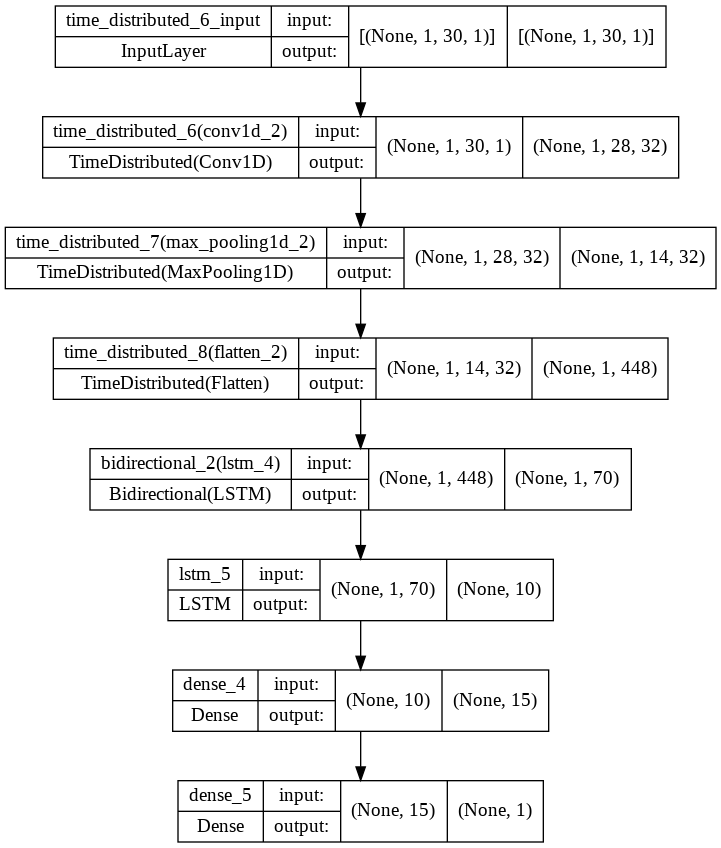

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 28, 32)        128       
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 14, 32)        0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 448)           0         
 tributed)                                                       
                                                                 
 bidirectional_2 (Bidirectio  (None, 1, 70)            135520    
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32, verbose=1, shuffle =True)

Epoch 1/100
20/20 [==============================] - 0s 22ms/step - loss: 2.4108e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 2/100
20/20 [==============================] - 0s 20ms/step - loss: 2.1444e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 2.4325e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 4/100
20/20 [==============================] - 0s 17ms/step - loss: 2.1980e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0463
Epoch 5/100
20/20 [==============================] - 0s 17ms/step - loss: 2.3476e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 2.1946e-04 - root_mean_squared_error: 0.0148 -

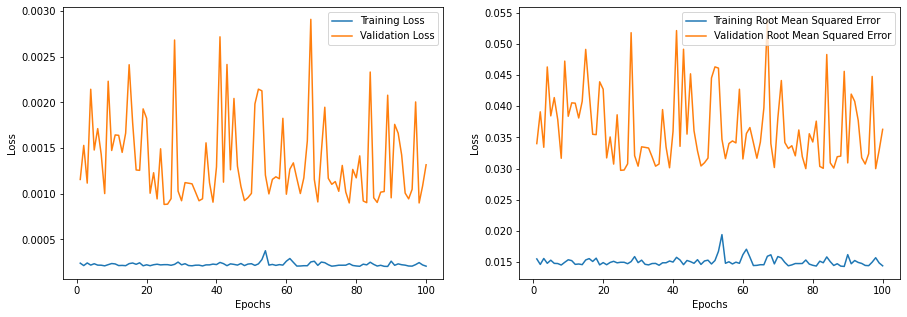

In [ ]:
plot_loss(history)

RMSE Score: 4.526
MAPE Score: 0.021


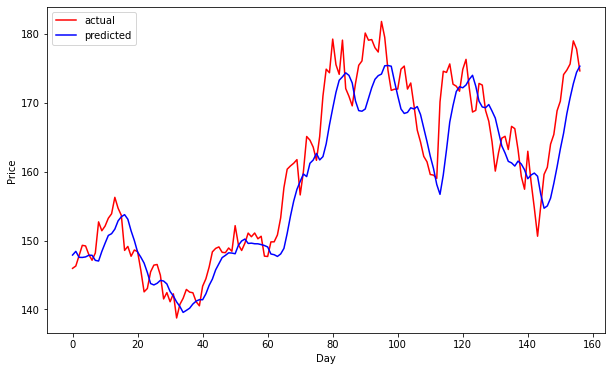

,actual,predicted
0,145.960739,147.891235
1,146.299805,148.426010
2,147.785751,147.558411
3,149.301620,147.542160
4,149.211838,147.618988
...,...,...
152,174.720001,168.388519
153,175.600006,170.685410
154,178.960007,172.742645
155,177.770004,174.405289


In [ ]:
predict(model, X_test, y_test, scaler)

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm_cnn(microsoft_stock, 30)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=16, verbose=1, shuffle =True)

Epoch 1/100
40/40 [==============================] - 0s 9ms/step - loss: 3.8951e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 4.7018e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 3.3501e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 3.5666e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 3.1063e-04 - root_mean_squared_error: 0.0176 - val_loss: 9.7718e-04 - val_root_mean_squared_error: 0.0313
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 2.9574e-04 - root_mean_squared_error: 0.0172 - v

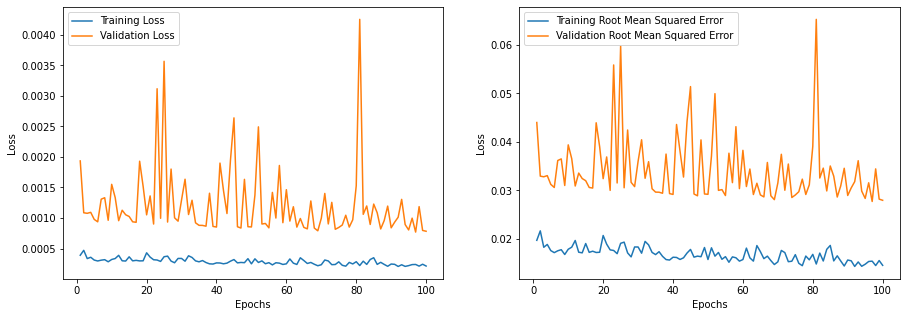

In [ ]:
plot_loss(history)

RMSE Score: 6.950
MAPE Score: 0.018


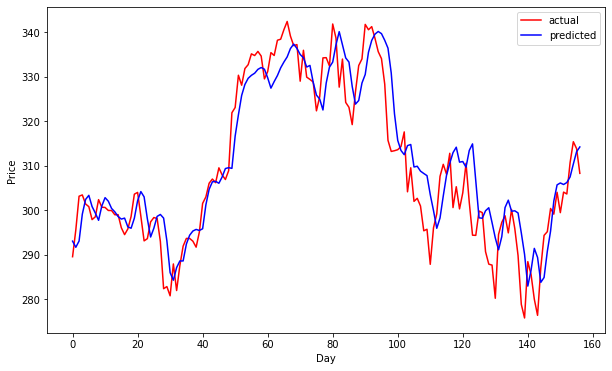

,actual,predicted
0,289.600281,293.094849
1,295.616760,291.719330
2,303.177277,293.117218
3,303.466187,299.154480
4,301.444061,302.446411
...,...,...
152,303.679993,306.250336
153,310.700012,307.504211
154,315.410004,310.401001
155,313.859985,313.162170


In [ ]:
predict(model, X_test, y_test, scaler)

In [ ]:
X_train, X_test, y_train, y_test, scaler = train_test_lstm_cnn(google_stock, 30)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=16, verbose=1, shuffle =True)

Epoch 1/50
40/40 [==============================] - 0s 9ms/step - loss: 3.5792e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0316
Epoch 2/50
40/40 [==============================] - 0s 8ms/step - loss: 2.8142e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 3/50
40/40 [==============================] - 0s 8ms/step - loss: 2.7688e-04 - root_mean_squared_error: 0.0166 - val_loss: 9.7335e-04 - val_root_mean_squared_error: 0.0312
Epoch 4/50
40/40 [==============================] - 0s 8ms/step - loss: 2.7823e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 5/50
40/40 [==============================] - 0s 8ms/step - loss: 2.9773e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 6/50
40/40 [==============================] - 0s 8ms/step - loss: 3.8013e-04 - root_mean_squared_error: 0.0195 - val_los

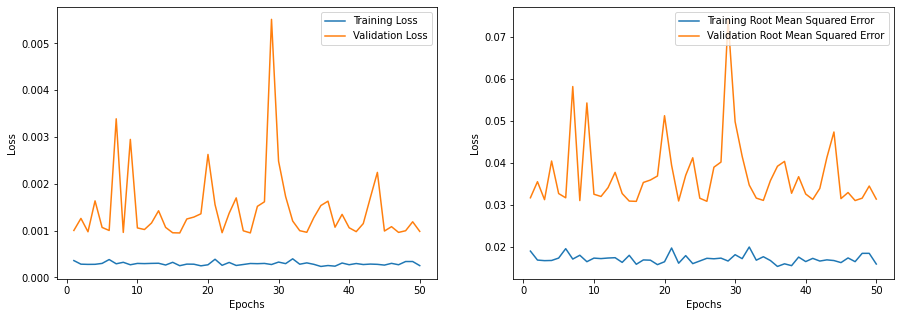

In [ ]:
plot_loss(history)

RMSE Score: 61.765
MAPE Score: 0.018


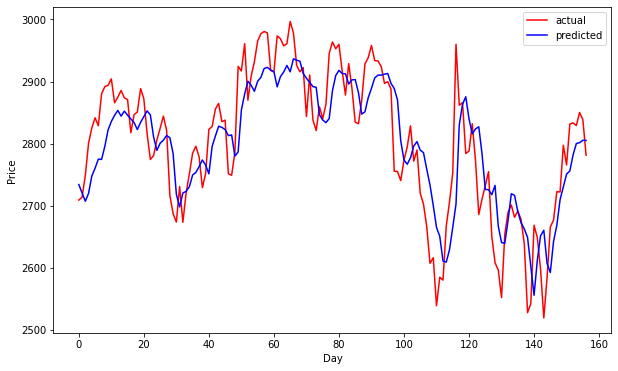

,actual,predicted
0,2708.979980,2734.009766
1,2713.600098,2720.415527
2,2748.590088,2707.088867
3,2800.830078,2719.891357
4,2825.229980,2747.786133
...,...,...
152,2833.459961,2781.789795
153,2829.110107,2800.010254
154,2850.110107,2801.496826
155,2838.770020,2805.316650


In [ ]:
predict(model, X_test, y_test, scaler)